### 作業需求
請完成以下文字探勘需求：

1. 將新聞 article.txt (https://github.com/ywchiu/tibame_tm/blob/master/data/article.txt) 下載存入到自己電腦
2. 請使用 jieba 將演說文切詞
3. 統計該演說文最常出現的十大字詞
4. 使用文字雲繪製該中文資料


### 評分標準
1. 程式碼能順利運行 (20%)
2. 程式碼能順利統計該演說文中最常出現10大字詞 (50%)
3. 程式碼能使用wordcloud 套件將演說文繪製成文字雲 (30%)

#Start!!

In [21]:
import jieba
from collections import Counter
from wordcloud import WordCloud


##安裝Jieba-ZH-TW

In [10]:
! git clone https://github.com/ldkrsi/jieba-zh_TW.git

Cloning into 'jieba-zh_TW'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320
Receiving objects: 100% (2320/2320), 44.97 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (1311/1311), done.


In [11]:
print(jieba.get_dict_file().name)

/usr/local/lib/python3.7/dist-packages/jieba/dict.txt


In [13]:
! ls jieba-zh_TW/

Changelog  jieba  LICENSE  MANIFEST.in	README.md


###取代簡體jieba

In [14]:
! mv jieba-zh_TW/jieba /usr/local/lib/python3.7/dist-packages/jieba

##斷詞and統計字詞頻率

In [17]:
with open("article.txt", "r") as f:
  # contents_read_lines = f.readlines()
  contents_read = f.read()

# print(contents_read)
word_list = [w for w in jieba.cut(contents_read) if len(w)>=2]
word_count = Counter(word_list)

print(word_list)
print(word_count)
print(word_count.most_common(10))

['賴副', '總統', '現場', '各位', '貴賓', '電視', '機前', '跟網', '路上', '朋友', '全體', '國人', '同胞', '大家', '專題', '蔡總統', '關心', '什麼', '職演', '全文', 'Facebook', '貼文', '解析', '作為', '共同', '體的', '台灣', '今天', '這裡', '以無比', '感恩', '心情', '再次', '承擔', '台灣', '人民', '交付', '給我', '責任', '這是', '中華民國史', '最特別', '總統', '職典禮', '特別', '地方', '典禮', '規模', '人數', '我們', '知道', '一路', '走來', '多麼', '容易', '我要', '感謝', '台灣', '人民', '這麼', '容易', '台灣', '發生', '我要', '特別', '謝謝', '一些', '他們', '過去', '這四個', '防疫', '期間', '很少', '提及', '我要', '謝謝', '一位', '防疫', '初期', '藥房', '門口', '排隊', '台灣', '人民', '謝謝', '耐心', '以及', '謝謝', '政府', '信任', '全世界', '看到', '台灣', '即使', '不安', '時刻', '保持', '公民', '美德', '謝謝', '那些', '居家', '檢疫', '居家', '隔離', '你們', '忍受', '生活', '不便', '保護', '他人', '健康', '謝謝', '展現', '人性', '善良', '一面', '成就', '台灣', '防疫', '成功', '國家', '光榮感', '生死', '共同', '一段', '記憶', '將會', '存在', '我們', '一個', '心中', '團結', '感覺', '就是', '這個', '樣子', '我們', '今天', '現場', '許多', '各國', '使節', '代表', '而且', '相信', '世界', '一定', '許多國家', '關心', '台灣', '這個', '機會', '告訴', '你們', '看到', '國家', '一群', '善良', '堅韌', '人民', '一群', '人民', '無論

##下載notosans (google開源中文字型)

In [18]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2022-10-25 07:19:40--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.81.208, 2607:f8b0:4004:82f::2010
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   192MB/s    in 0.6s    

2022-10-25 07:19:40 (192 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [19]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


##利用WordCloud產生文字雲

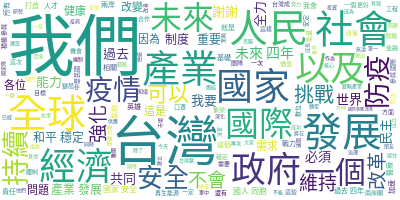

In [24]:
wc = WordCloud(background_color="white", font_path="/content/NotoSansCJKtc-Regular.otf")
# wordcloud只吃string型別，因此需先將斷詞結果串聯起來。
wc.generate(" ".join(word_list))
wc.to_image()